In [60]:
# read in votes as a duckdb and count the number of votes per proposal
import duckdb

db = duckdb.connect(database=':memory:', read_only=False)
# as view
db.execute("CREATE VIEW votes AS SELECT * FROM parquet_scan('{}')".format('../parquets_version3/votes.parquet'))
db.execute("CREATE VIEW proposals AS SELECT * FROM parquet_scan('{}')".format('../parquets_version3/proposals.parquet'))
# same for deployments
db.execute("CREATE VIEW deployments AS SELECT * FROM parquet_scan('{}')".format('../parquets_version3/deployments.parquet'))
# select all
db.execute("SELECT * FROM votes LIMIT 4").fetchdf()

,id,proposal_id,deployment_id,platform_vote_id,voter,date,choice,weight
0,6755eb11-f57b-5841-961b-ededa4411a91,a7f83165-6b46-5aa5-a363-8c803825e9db,f3ef168e-d216-573c-ba95-ff15d29069fe,HFhP5bFDBq6sP54RrkxCir75793686LFCCqbrFRAzgAM,96ZVN79M5QKsJcvXkxuEx9wYWoCYZHtuP1Y8EJhrJyw,NaT,"[{'rank': 0, 'weightPercentage': 100}]",1.0
1,0c79521b-223f-5174-8e00-e7b96bc1b871,a7f83165-6b46-5aa5-a363-8c803825e9db,f3ef168e-d216-573c-ba95-ff15d29069fe,7Cw6ukhy4wuUnFwgqDAA7m7VkVV5QWiGtDRwVmadx5aZ,SQ2t2hU2g5nofFt3D5MhNfaey7QSjEHe5pBEFCPP2F7,NaT,"[{'rank': 0, 'weightPercentage': 100}]",1.0
2,e9895866-0f92-5fd7-945f-3c04dd3692c1,a7f83165-6b46-5aa5-a363-8c803825e9db,f3ef168e-d216-573c-ba95-ff15d29069fe,91z2tkWCnEBo7SyoHogqnnRQURQgi1LEKevwwpa5s3UV,568F8CYYDE9BuKPqw5MzYFqwafDSWagPQMz8XQi19RXq,NaT,"[{'rank': 0, 'weightPercentage': 100}]",1.0
3,e1aada30-aa76-57f1-85d3-9c06da614245,a7f83165-6b46-5aa5-a363-8c803825e9db,f3ef168e-d216-573c-ba95-ff15d29069fe,C2E43Xunhb4xPwcqrb5fvg9MXktJbvUNHGdLiXNKHrci,5qAnY8pqRa4ZyLDmXv8t9eChN52EtZs63SiCPY9KdWJh,NaT,"[{'rank': 0, 'weightPercentage': 100}]",1.0


In [61]:
# count all votes
db.execute("SELECT COUNT(*) FROM votes").fetchdf()

,count_star()
0,21617900


In [62]:
# count proposals
db.execute("SELECT COUNT(*) FROM proposals").fetchdf()

,count_star()
0,205321


In [63]:
# count deployments
db.execute("SELECT COUNT(*) FROM deployments").fetchdf()

,count_star()
0,30128


In [64]:
# group by proposal_id and count
db.execute("SELECT proposal_id, COUNT(*) FROM votes GROUP BY proposal_id").fetchdf()

,proposal_id,count_star()
0,e9a4ae2d-f45f-5361-9485-59873f5bbca0,2
1,5badfaf0-fb6b-5050-85ec-9e4a8b97d759,1
2,e4e5343b-4205-5561-9722-60a80e37fc82,1
3,b2f87149-e969-5486-b43f-58585a96646b,1
4,924663af-1ba7-534b-adde-d7bec9b6a3af,2
...,...,...
150660,5901cc97-e127-5940-b704-c13b3d50607c,1
150661,2f6f3dc0-56ab-5905-acd7-8f5e04388432,2
150662,d40af262-36a1-57cb-8be6-5b3954fb7139,35
150663,4ad75e43-1b58-58f1-87a8-3dbf3a95f9ed,4


In [65]:
# write a query to select all from the proposals table and join it with a count of votes from the votes table
query = """
SELECT p.*, v.count
FROM proposals p
LEFT JOIN (
    SELECT proposal_id, COUNT(*) as count
    FROM votes
    GROUP BY proposal_id
) v ON p.id = v.proposal_id
"""
proposals_with_count = db.execute(query)
proposals_with_updated_count = proposals_with_count.fetchdf()
proposals_with_updated_count.head()

,id,deployment_id,platform_proposal_id,author,date,votes_count,platform,count
0,5badfaf0-fb6b-5050-85ec-9e4a8b97d759,167ec1a5-0bec-5fde-9496-5caa7d004487,EUrU9LLfbEqra1TXZXhYKpJfvYhKLJJuVy1weZNUnt4G,nan,2022-10-30 18:30:31,1,realms,1.0
1,e4e5343b-4205-5561-9722-60a80e37fc82,42d9f322-1f55-58a3-83c4-9fc82666559b,DsaGqF8tpiQqwJGxGP6JXAWUo9L623jWBnexHuxEkrZ3,nan,2022-06-02 07:58:12,1,realms,1.0
2,924663af-1ba7-534b-adde-d7bec9b6a3af,881167d8-3707-5640-9716-ab77768b4ebe,5dDX6gBPGfTeuQdV93aNL6PtTMFxCXXiYVFMxzD7kJdc,nan,2022-03-24 13:42:45,2,realms,2.0
3,b4bd6548-2898-5523-aab2-24d40aab3910,881167d8-3707-5640-9716-ab77768b4ebe,8icCe6sAdDQCnMg9a3LQVsRH8vyT2UdYE64ET7Uk232n,nan,2022-09-22 23:30:14,2,realms,2.0
4,d9368ff7-ec0f-5747-a7ca-827a746415ab,fbbc05e2-7149-5eed-9899-c9a83eea5545,HJFtqkKE9sxmMqYaHK8LeoFbibufZMzDn8UWdzJbJWyc,nan,2022-02-16 04:05:58,1,realms,1.0


In [66]:
# count nan values in 'count'
proposals_with_updated_count['count'].isna().sum()

54762

In [67]:
# and non-nan values
proposals_with_updated_count['count'].notna().sum()

150559

In [68]:
# fill nas with 0
proposals_with_updated_count['count'] = proposals_with_updated_count['count'].fillna(0)
# make col an int
proposals_with_updated_count['count'] = proposals_with_updated_count['count'].astype(int)
proposals_with_updated_count.head()

,id,deployment_id,platform_proposal_id,author,date,votes_count,platform,count
0,5badfaf0-fb6b-5050-85ec-9e4a8b97d759,167ec1a5-0bec-5fde-9496-5caa7d004487,EUrU9LLfbEqra1TXZXhYKpJfvYhKLJJuVy1weZNUnt4G,nan,2022-10-30 18:30:31,1,realms,1
1,e4e5343b-4205-5561-9722-60a80e37fc82,42d9f322-1f55-58a3-83c4-9fc82666559b,DsaGqF8tpiQqwJGxGP6JXAWUo9L623jWBnexHuxEkrZ3,nan,2022-06-02 07:58:12,1,realms,1
2,924663af-1ba7-534b-adde-d7bec9b6a3af,881167d8-3707-5640-9716-ab77768b4ebe,5dDX6gBPGfTeuQdV93aNL6PtTMFxCXXiYVFMxzD7kJdc,nan,2022-03-24 13:42:45,2,realms,2
3,b4bd6548-2898-5523-aab2-24d40aab3910,881167d8-3707-5640-9716-ab77768b4ebe,8icCe6sAdDQCnMg9a3LQVsRH8vyT2UdYE64ET7Uk232n,nan,2022-09-22 23:30:14,2,realms,2
4,d9368ff7-ec0f-5747-a7ca-827a746415ab,fbbc05e2-7149-5eed-9899-c9a83eea5545,HJFtqkKE9sxmMqYaHK8LeoFbibufZMzDn8UWdzJbJWyc,nan,2022-02-16 04:05:58,1,realms,1


<Axes: xlabel='votes_count', ylabel='count'>

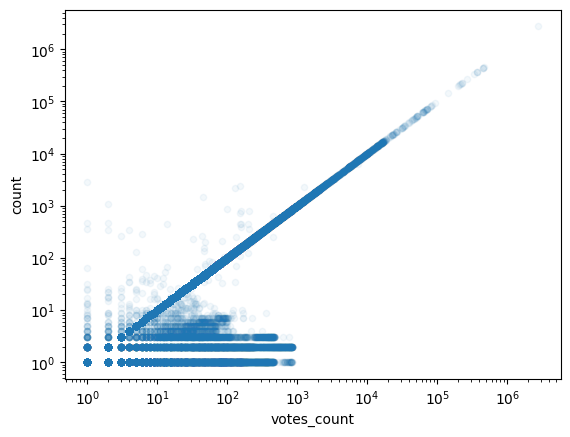

In [69]:
# plot scatter votes_count vs count
proposals_with_updated_count.plot.scatter(x='votes_count', y='count', loglog=True, alpha=0.05)

<Axes: xlabel='votes_count', ylabel='count'>

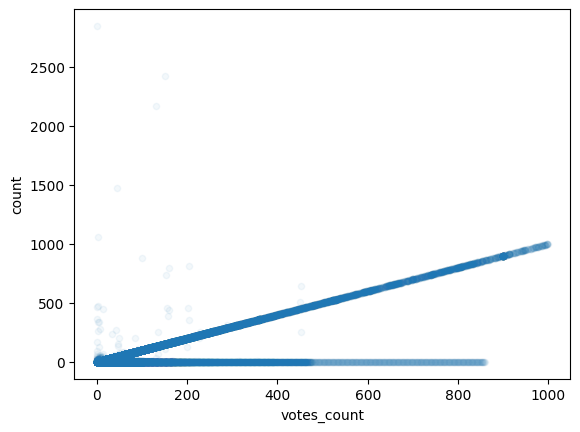

In [70]:
# plot again without loglog and max 1000 votes, opacity 0.05
proposals_with_updated_count[proposals_with_updated_count['votes_count'] < 1000].plot.scatter(x='votes_count', y='count', alpha=0.05)

In [71]:
# the line at the bottom could indicate that we are missing votes, i.e.,
# platforms that report votes_count as 200 but we actually only have 0

In [72]:
# some variation, but not too much
# what's the correlation?
proposals_with_updated_count['votes_count'].corr(proposals_with_updated_count['count'])

0.9999788784926288

In [73]:
proposals_with_updated_count = proposals_with_updated_count.drop(columns=['votes_count'])
proposals_with_updated_count.head()

,id,deployment_id,platform_proposal_id,author,date,platform,count
0,5badfaf0-fb6b-5050-85ec-9e4a8b97d759,167ec1a5-0bec-5fde-9496-5caa7d004487,EUrU9LLfbEqra1TXZXhYKpJfvYhKLJJuVy1weZNUnt4G,nan,2022-10-30 18:30:31,realms,1
1,e4e5343b-4205-5561-9722-60a80e37fc82,42d9f322-1f55-58a3-83c4-9fc82666559b,DsaGqF8tpiQqwJGxGP6JXAWUo9L623jWBnexHuxEkrZ3,nan,2022-06-02 07:58:12,realms,1
2,924663af-1ba7-534b-adde-d7bec9b6a3af,881167d8-3707-5640-9716-ab77768b4ebe,5dDX6gBPGfTeuQdV93aNL6PtTMFxCXXiYVFMxzD7kJdc,nan,2022-03-24 13:42:45,realms,2
3,b4bd6548-2898-5523-aab2-24d40aab3910,881167d8-3707-5640-9716-ab77768b4ebe,8icCe6sAdDQCnMg9a3LQVsRH8vyT2UdYE64ET7Uk232n,nan,2022-09-22 23:30:14,realms,2
4,d9368ff7-ec0f-5747-a7ca-827a746415ab,fbbc05e2-7149-5eed-9899-c9a83eea5545,HJFtqkKE9sxmMqYaHK8LeoFbibufZMzDn8UWdzJbJWyc,nan,2022-02-16 04:05:58,realms,1


In [74]:
# rename count to votes_count
proposals_with_updated_count = proposals_with_updated_count.rename(columns={'count': 'votes_count'})
proposals_with_updated_count = proposals_with_updated_count[[
    'id',
    'deployment_id',
    'platform_proposal_id',
    'author',
    'date',
    'votes_count',
    'platform'
]]
proposals_with_updated_count.head()

,id,deployment_id,platform_proposal_id,author,date,votes_count,platform
0,5badfaf0-fb6b-5050-85ec-9e4a8b97d759,167ec1a5-0bec-5fde-9496-5caa7d004487,EUrU9LLfbEqra1TXZXhYKpJfvYhKLJJuVy1weZNUnt4G,nan,2022-10-30 18:30:31,1,realms
1,e4e5343b-4205-5561-9722-60a80e37fc82,42d9f322-1f55-58a3-83c4-9fc82666559b,DsaGqF8tpiQqwJGxGP6JXAWUo9L623jWBnexHuxEkrZ3,nan,2022-06-02 07:58:12,1,realms
2,924663af-1ba7-534b-adde-d7bec9b6a3af,881167d8-3707-5640-9716-ab77768b4ebe,5dDX6gBPGfTeuQdV93aNL6PtTMFxCXXiYVFMxzD7kJdc,nan,2022-03-24 13:42:45,2,realms
3,b4bd6548-2898-5523-aab2-24d40aab3910,881167d8-3707-5640-9716-ab77768b4ebe,8icCe6sAdDQCnMg9a3LQVsRH8vyT2UdYE64ET7Uk232n,nan,2022-09-22 23:30:14,2,realms
4,d9368ff7-ec0f-5747-a7ca-827a746415ab,fbbc05e2-7149-5eed-9899-c9a83eea5545,HJFtqkKE9sxmMqYaHK8LeoFbibufZMzDn8UWdzJbJWyc,nan,2022-02-16 04:05:58,1,realms


In [75]:
# load up the original proposals table to confirm schema
import pyarrow.parquet as pq
proposals = pq.read_table('../parquets_version3/proposals.parquet')
proposals.schema

id: string
deployment_id: string
platform_proposal_id: string
author: string
date: string
votes_count: int64
platform: string

In [77]:
# make to pyarrow table
import pyarrow as pa
proposals_with_updated_count_table = pa.Table.from_pandas(proposals_with_updated_count)
proposals_with_updated_count_table.schema

id: string
deployment_id: string
platform_proposal_id: string
author: string
date: string
votes_count: int64
platform: string
-- schema metadata --
pandas: '{"index_columns": [{"kind": "range", "name": null, "start": 0, "' + 1089

In [79]:
# save in version 4
pq.write_table(proposals_with_updated_count_table, '../parquets_version4/proposals.parquet')